In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 39.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mediapipe as mp
from google.colab import files
import zipfile
from google.colab import drive

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-03 19:52:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-03 19:52:42 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data, walk_through_dir

# Data Collection folders setup

In [ ]:
drive.mount('/content/gdrive')

img_path = '/content/gdrive/My Drive/input_dataset/hello/images.jpeg'

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread(img_path)

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
def convert_images(input_folder_path , output_folder_path):
  if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Initialize the Mediapipe Holistic model
  mp_holistic = mp.solutions.holistic

  # Loop over all image files in the input folder
  i=0;
  for filename in os.listdir(input_folder_path):
      # Check if the file is an image file
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
          # Define the path to the input image file
          input_image_path = os.path.join(input_folder_path, filename)

          # Load the input image
          input_image = cv2.imread(input_image_path)

          # Convert the image to RGB format
          input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

          # Initialize the Holistic model and process the input image
          with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
              results = holistic.process(input_image)

          # Extract the pose, face, left hand, and right hand landmarks from the results
          pose_landmarks = results.pose_landmarks
          face_landmarks = results.face_landmarks
          left_hand_landmarks = results.left_hand_landmarks
          right_hand_landmarks = results.right_hand_landmarks

          # Convert the landmarks to NumPy arrays
          pose_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in pose_landmarks.landmark]).flatten() if pose_landmarks else np.zeros(33*4)
          face_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in face_landmarks.landmark]).flatten() if face_landmarks else np.zeros(468*3)
          left_hand_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in left_hand_landmarks.landmark]).flatten() if left_hand_landmarks else np.zeros(21*3)
          right_hand_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in right_hand_landmarks.landmark]).flatten() if right_hand_landmarks else np.zeros(21*3)

          main_np = np.concatenate([pose_landmarks_array , face_landmarks_array , left_hand_landmarks_array , right_hand_landmarks_array])
          # main_np = np.concatenate([pose_landmarks_array , face_landmarks_array  , right_hand_landmarks_array])



          # Define the paths to the output files

          # main_np_op_path = os.path.join(output_folder_path , f'{filename}_array.npy')
          main_np_op_path = os.path.join(output_folder_path , f'{i}.npy')



          # Save the landmarks as NumPy arrays
          np.save(main_np_op_path , main_np)
          i = i+1


In [ ]:
def get_npArray(imagePath):
  mp_holistics = mp.solutions.holistic
  input_image = cv2.imread(imagePath)
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

  with mp_holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    results = holistic.process(input_image)

  pose_landmarks = results.pose_landmarks
  face_landmarks = results.face_landmarks
  left_hand_landmarks = results.left_hand_landmarks
  right_hand_landmarks = results.right_hand_landmarks

          # Convert the landmarks to NumPy arrays
  pose_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in pose_landmarks.landmark]).flatten() if pose_landmarks else np.zeros(33*4)
  face_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in face_landmarks.landmark]).flatten() if face_landmarks else np.zeros(468*3)
  left_hand_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in left_hand_landmarks.landmark]).flatten() if left_hand_landmarks else np.zeros(21*3)
  right_hand_landmarks_array = np.array([[lmk.x, lmk.y, lmk.z] for lmk in right_hand_landmarks.landmark]).flatten() if right_hand_landmarks else np.zeros(21*3)

  # getting main concatenated array
  main_np = np.concatenate([pose_landmarks_array , face_landmarks_array , left_hand_landmarks_array , right_hand_landmarks_array] , dtype=object)
  resized = np.reshape(main_np, [1,1629])
  return resized

In [ ]:
test_path = '/content/gdrive/My Drive/custom_test/iloveyou.jpg'

test_arr = get_npArray(test_path)

In [ ]:
# l = tf.convert_to_tensor(test_arr , dtype=np.float32)
# l_ = tf.reshape(l, [1,1629])
# l_.shape

l = tf.convert_to_tensor(test_arr , dtype=np.float32)
l.shape


TensorShape([1, 1629])

**FOR ILOVEYOU IMAGE CONVERSION**

In [ ]:
input_path_ily = '/content/gdrive/My Drive/input_dataset/iloveyou'
output_path_ily = '/content/gdrive/My Drive/output_dataset_np/iloveyou'

convert_images(input_folder_path=input_path_ily , output_folder_path=output_path_ily)

**FOR HELLO CONVERSION**

In [ ]:
input_path_hello = '/content/gdrive/My Drive/input_dataset/hello'
output_path_hello = '/content/gdrive/My Drive/output_dataset_np/hello'

convert_images(input_folder_path=input_path_hello , output_folder_path=output_path_hello)

**FOR FRIEND IMAGE CONVERSION**

In [ ]:
input_path_friend = '/content/gdrive/My Drive/input_dataset/friend'
output_path_friend = '/content/gdrive/My Drive/output_dataset_np/friend'

convert_images(input_folder_path=input_path_friend , output_folder_path=output_path_friend)

**FOR A CONVERSION**

In [ ]:
input_path_A = '/content/gdrive/My Drive/input_dataset/A'
output_path_A = '/content/gdrive/My Drive/output_dataset_np/A'

convert_images(input_folder_path=input_path_A , output_folder_path=output_path_A)

NameError: ignored

for 7 conversion

In [ ]:
input_path_7 = '/content/gdrive/My Drive/input_dataset/7'
output_path_7 = '/content/gdrive/My Drive/output_dataset_np/7'

convert_images(input_folder_path=input_path_7 , output_folder_path=output_path_7)

NameError: ignored

# DATA PREPROCESSING

In [ ]:
op_path = '/content/gdrive/My Drive/output_dataset_np'
walk_through_dir(op_path)

There are 5 directories and 0 images in '/content/gdrive/My Drive/output_dataset_np'.
There are 0 directories and 70 images in '/content/gdrive/My Drive/output_dataset_np/7'.
There are 0 directories and 70 images in '/content/gdrive/My Drive/output_dataset_np/A'.
There are 0 directories and 70 images in '/content/gdrive/My Drive/output_dataset_np/iloveyou'.
There are 0 directories and 70 images in '/content/gdrive/My Drive/output_dataset_np/hello'.
There are 0 directories and 70 images in '/content/gdrive/My Drive/output_dataset_np/friend'.


In [ ]:
actions = np.array(['hello', 'iloveyou' , 'friend' , 'A' , '7'])



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'hello': 0, 'iloveyou': 1, 'friend': 2, 'A': 3, '7': 4}

In [ ]:
sequence_length = 1
no_sequences = 70
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
    # for sequence in np.array(os.listdir(os.path.join(op_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(op_path, action,  "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [ ]:
sequences[0]

[array([ 0.5593257 ,  0.58682394, -1.42962551, ...,  0.15085964,
         0.3057456 , -0.04163384])]

In [ ]:
a = tf.convert_to_tensor(sequences[0] , dtype=np.float32)
a.shape

TensorShape([1, 1629])

In [ ]:
a.shape == l.shape

True

In [ ]:
np.array(sequences , dtype=object).shape

(350, 1, 1629)

In [ ]:
np.array(labels).shape

(350,)

Getting X and Y

In [ ]:
X = np.array(sequences , dtype=object)
X.shape



(350, 1, 1629)

In [ ]:
Y = to_categorical(labels).astype(int)
Y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
Y.shape

(350, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
X_train.shape , y_train.shape , X_test[2].shape

((315, 1, 1629), (315, 5), (1, 1629))

In [ ]:
y_test.shape

(35, 5)

# Building the Model

In [ ]:
X_train_tf =  tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf =  tf.convert_to_tensor(y_train, dtype=tf.float32)

In [ ]:
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [ ]:
X_train_tf.shape

TensorShape([315, 1, 1629])

In [ ]:
X_train[0].shape

(1, 1629)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Conv2D, MaxPool2D, Flatten , Embedding , Reshape

# LSTM model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
INPUT_SHAPE = (1,1629)



model = Sequential()
# model.add(tf.keras.layers.Reshape((1, INPUT_SHAPE[0])))
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=INPUT_SHAPE))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
from keras.utils.vis_utils import plot_model

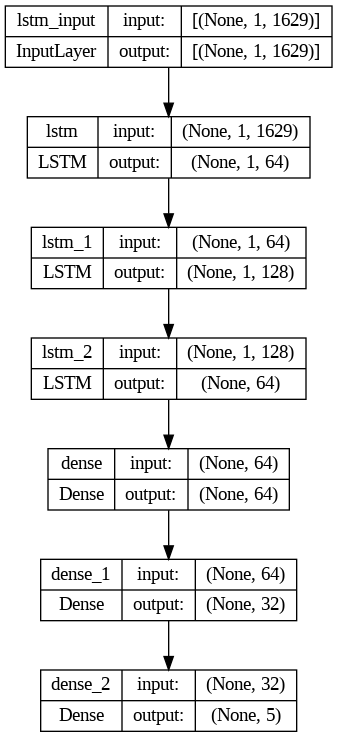

In [ ]:
plot_model(model , show_shapes = True , show_layer_names = True)

In [ ]:
alpha = np.load('/content/gdrive/My Drive/output_dataset_np/A/0.npy')
alpha.shape

(1629,)

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
model_hist = model.fit(X_train_tf, y_train_tf, epochs=50,
                       validation_data = (X_test_tf, tf.convert_to_tensor(y_test, dtype=tf.float32)))

Epoch 1/50
10/10 [==============================] - 15s 175ms/step - loss: 1.6089 - accuracy: 0.1873 - val_loss: 1.6034 - val_accuracy: 0.4857
Epoch 2/50
10/10 [==============================] - 1s 68ms/step - loss: 1.5828 - accuracy: 0.5778 - val_loss: 1.5197 - val_accuracy: 0.4857
Epoch 3/50
10/10 [==============================] - 1s 68ms/step - loss: 1.3613 - accuracy: 0.3714 - val_loss: 1.0555 - val_accuracy: 0.6571
Epoch 4/50
10/10 [==============================] - 1s 100ms/step - loss: 0.9527 - accuracy: 0.5079 - val_loss: 0.7864 - val_accuracy: 0.6571
Epoch 5/50
10/10 [==============================] - 1s 77ms/step - loss: 0.7827 - accuracy: 0.6095 - val_loss: 0.5796 - val_accuracy: 0.6000
Epoch 6/50
10/10 [==============================] - 0s 38ms/step - loss: 0.7490 - accuracy: 0.6159 - val_loss: 0.5969 - val_accuracy: 0.6000
Epoch 7/50
10/10 [==============================] - 0s 38ms/step - loss: 0.6601 - accuracy: 0.6317 - val_loss: 0.5661 - val_accuracy: 0.6000
Epoch 8/50

In [ ]:
model.evaluate(tf.convert_to_tensor(X_test, dtype=tf.float32) , tf.convert_to_tensor(y_test, dtype=tf.float32))
# model.predict(X_test[0])

2/2 [==============================] - 0s 8ms/step - loss: 9.7411e-07 - accuracy: 1.0000


[9.741091844261973e-07, 1.0]

In [ ]:
predictions = model.predict(tf.convert_to_tensor(X_test , dtype =tf.float32))

2/2 [==============================] - 1s 15ms/step


In [ ]:
predictions[0]

array([3.9817482e-07, 9.9994397e-01, 5.4291078e-09, 5.5703262e-05,
       8.6316303e-14], dtype=float32)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
tf.round(predictions)[:10]

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
multilabel_confusion_matrix(y_test , tf.round(predictions))

array([[[27,  0],
        [ 0,  8]],

       [[29,  0],
        [ 0,  6]],

       [[29,  0],
        [ 0,  6]],

       [[31,  0],
        [ 0,  4]],

       [[24,  0],
        [ 0, 11]]])

In [ ]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

def calculate_results(y_true , y_pred):
  model_accuracy = accuracy_score(y_true , y_pred)*100
  # calculate model pres , recall , f1 score using "weighted" average
  model_precision , model_recall , model_f1 , _ = precision_recall_fscore_support(y_true , y_pred , average = "weighted")
  model_results = {"accuracy" : model_accuracy,
                   "precison" : model_precision,
                   "recall": model_recall,
                   "F1 score" : model_f1}
  return model_results

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = multilabel_confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
import matplotlib.pyplot as plt


def visualize_continuous_multioutput(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Continuous Multioutput Predictions')
    plt.show()

In [ ]:
def generate_metric_labels(metric_name, num_classes):
    labels = [f"{metric_name} - Class {i+1}" for i in range(num_classes)]
    return labels


In [ ]:
num_classes = 5

precision_labels = generate_metric_labels("Precision", num_classes)
recall_labels = generate_metric_labels("Recall", num_classes)
f1_labels = generate_metric_labels("F1-Score", num_classes)

labels = np.array([precision_labels , recall_labels, f1_labels])

# Example usage of visualize_multilabel_metrics with custom metric labels
# visualize_multilabel_metrics(y_true, y_pred, precision_labels)
# visualize_multilabel_metrics(y_true, y_pred, recall_labels)
# visualize_multilabel_metrics(y_true, y_pred, f1_labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


def visualize_multilabel_metrics(y_true, y_pred, labels):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)

    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width, precision, width, label='Precision')
    ax.bar(x, recall, width, label='Recall')
    ax.bar(x + width, f1, width, label='F1-Score')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_xlabel('Labels')
    ax.set_ylabel('Score')
    ax.set_title('Multilabel Classification Metrics')

    plt.show()


# Plot

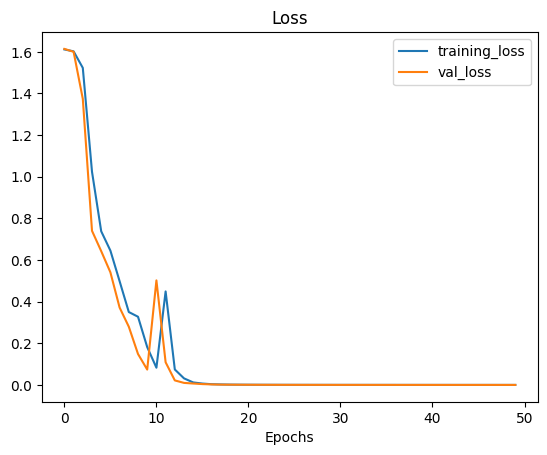

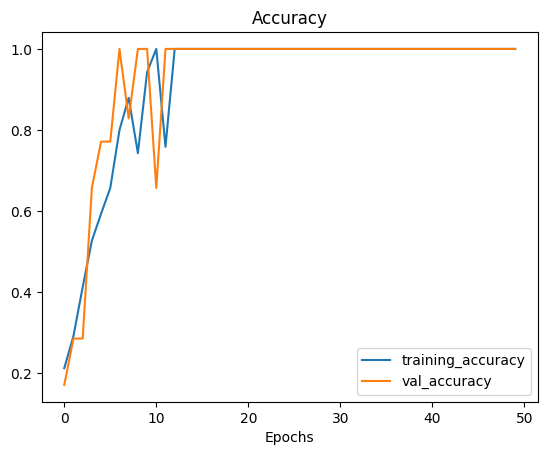

In [ ]:
plot_loss_curves(model_hist)

In [ ]:
X_test[0].shape , test_arr.shape , len(X_test)

((1, 1629), (1, 1629), 35)

# TESTING ON CUSTOM DATASET

In [ ]:
path2 = '/content/gdrive/My Drive/custom_test/hello.jpg'

test2 = get_npArray(path2)

test2_tf = tf.convert_to_tensor(test2 , dtype=np.float32)
test2_tf.shape
# test2_tf_ = tf.reshape(test2_tf , [None, 1 , 1629])


#l_ = tf.reshape(l, [1,1629])

TensorShape([1, 1629])

In [ ]:
path3 = '/content/gdrive/My Drive/custom_test/7.jpg'
path_7 = '/content/gdrive/My Drive/input_dataset/7/37.jpg'

test3 = get_npArray(path3)
test7 = get_npArray(path_7)
test7

array([[0.42233672738075256, 0.73638516664505, -0.7922444939613342, ...,
        0.0, 0.0, 0.0]], dtype=object)

In [ ]:
model.predict(tf.convert_to_tensor(test7 , dtype=np.float32))

In [ ]:
path_bhat = '/content/gdrive/My Drive/custom_test/hello.jpg'

test_b = get_npArray(path_bhat)

# solution

In [ ]:
u = []
u.append(test_b)
u = np.asarray(u)
u

array([[[0.39035019278526306, 0.6369215846061707, -1.103866457939148,
         ..., 0.0, 0.0, 0.0]]], dtype=object)

In [ ]:
u.shape , X_test.shape

((1, 1, 1629), (35, 1, 1, 1629))

In [ ]:
test3.shape , X_test.shape

In [ ]:
u_pred = model.predict(tf.convert_to_tensor(u , dtype=np.float32))

1/1 [==============================] - 0s 21ms/step


In [ ]:
actions[np.argmax(u_pred)]

'7'

In [ ]:
tf.convert_to_tensor(X_test[0] , dtype=np.float32)

In [ ]:
np.sum(predictions[0])

In [ ]:
for i in range(len(predictions)):
  print(actions[np.argmax(predictions[i])] == actions[np.argmax(y_test[i])])

In [ ]:
# t1 = '/content/gdrive/My Drive/custom_test'
# t2 = '/content/gdrive/My Drive/custom_test/np'

# convert_images(t1 , t2)

In [ ]:
model.save("Saved_trained_models")

In [ ]:
import tensorflow as tf

In [ ]:
model_ = tf.keras.models.load_model("Saved_trained_models")